In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
csv_url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'
df = pd.read_csv(csv_url)

In [25]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Lotto Texas  2918 non-null   object
 1   11           2918 non-null   int64 
 2   14           2918 non-null   int64 
 3   1992         2918 non-null   int64 
 4   13           2918 non-null   int64 
 5   16           2918 non-null   int64 
 6   22           2918 non-null   int64 
 7   29           2918 non-null   int64 
 8   32           2918 non-null   int64 
 9   36           2918 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 228.1+ KB


<AxesSubplot:>

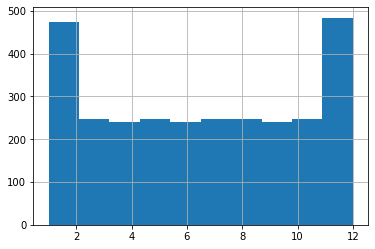

In [6]:
df['11'].hist()

In [7]:
q1 = df['11'].quantile(0.25)
q3 = df['11'].quantile(0.75)

In [8]:
iqr = q3 - q1
iqr

6.0

In [9]:
multiplier = 1.5

In [10]:
# lower outer fence: Q1 - 1.5*IQR
lower_fence = q1 - multiplier*iqr
lower_fence

-5.0

In [11]:
upper_fence = q3 + multiplier*iqr
upper_fence

19.0

<AxesSubplot:>

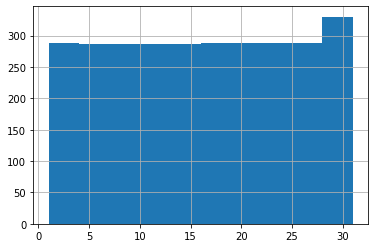

In [14]:
df['14'].hist()

In [15]:
q1 = df['14'].quantile(0.25)
q3 = df['14'].quantile(0.75)

In [16]:
iqr = q3 - q1
iqr

15.0

In [17]:
multiplier = 1.5

In [18]:
# lower outer fence: Q1 - 1.5*IQR
lower_fence = q1 - multiplier*iqr
lower_fence

-14.5

In [19]:
upper_fence = q3 + multiplier*iqr
upper_fence

45.5

In [26]:
def get_upper_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

def add_upper_outlier_columns(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    # outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k)
    #                 for col in df.select_dtypes('number')}
    # return df.assign(**outlier_cols)

    for col in df.select_dtypes('number'):
        df[col + '_outliers'] = get_upper_outliers(df[col], k)

    return df


In [27]:
add_upper_outlier_columns(df, k=1.5)


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_outliers,Rainfall_outliers,Flyers_outliers,Price_outliers,Sales_outliers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.0,0.70,0.0,0.0,0.0
1,1/2/17,Monday,28.9,1.33,15,0.5,13,0.0,0.03,0.0,0.0,0.0
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,0.0,0.03,0.0,0.0,0.0
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,0.0,0.00,0.0,0.0,0.0
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,0.0,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19,0.0,0.00,0.0,0.0,0.0
361,12/28/17,Thursday,37.8,1.25,32,0.5,16,0.0,0.00,0.0,0.0,0.0
362,12/29/17,Friday,39.5,1.25,17,0.5,15,0.0,0.00,0.0,0.0,0.0
363,12/30/17,Saturday,30.9,1.43,22,0.5,13,0.0,0.13,0.0,0.0,0.0


Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?